In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
# there is no intersection between samples
set(df['Loan_ID']).intersection(set(df_test['Loan_ID']))

set()

In [ ]:
# Total -> 614
# Loan_ID              drop ok
# Gender               601 discretize and fill with mode (or random) ok
# Married              611 discretize and fill with mode (or random) ok
# Dependents           599 string to number and fill with median
# Education            614 discretize
# Self_Employed        582 discretize and fill with mode (or random) ok
# ApplicantIncome      614 OK
# CoapplicantIncome    614 OK
# LoanAmount           592 fill with mean
# Loan_Amount_Term     600 fill with mean
# Credit_History       564 fill with mode (or random) ok
# Property_Area        614 OK
# Loan_Status          614 OK

# fill with model
# add cluster labels (or different model given cluster)
# normalization

In [30]:
df = df.drop('Loan_ID', axis=1)

In [33]:
for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [36]:
for column in ['LoanAmount', 'Loan_Amount_Term']:
    df[column] = df[column].fillna(df[column].mean())

In [51]:
replace_dict = {'0': 0, '1': 1, '2': 2, '3+': 3}
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].replace(replace_dict).dropna().median())
df['Dependents'] = df['Dependents'].replace(replace_dict)

In [67]:
for column in ['Gender', 'Married', 'Self_Employed', 'Education', 'Loan_Status']:
    df[column] = df[column].replace({df[column].unique()[0]: 0, df[column].unique()[1]: 1})

In [73]:
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

In [77]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [110]:
results = pd.DataFrame(columns=['modelo', 'scoring', 'mean', 'std', 'time'])

In [111]:
import time
def run_model(clf, X, y, scoring='accuracy', verbose=0):
    start = int(time.time() * 1000)
    scores = cross_val_score(clf, X, y, cv=5, scoring=scoring, verbose=verbose)
    end = int(time.time() * 1000)
    idx = len(results)
    results.loc[idx] = [str(clf.__class__).split('.')[-1].replace('>','').replace("'",''),
                           scoring, "%0.2f" % scores.mean(), "(+/- %0.2f)" % (scores.std() * 2),
                           str(end - start)]
    print('\t'.join(results.loc[idx]))

In [112]:
def run_models(X, y):
    run_model(RidgeClassifier(), X, y)
    run_model(PassiveAggressiveClassifier(), X, y)
    run_model(GaussianNB(), X, y)
    run_model(SVC(), X, y)
    run_model(KNeighborsClassifier(), X, y)
    run_model(GaussianProcessClassifier(), X, y)
    run_model(MLPClassifier(), X, y)
    run_model(LogisticRegression(), X, y)
    run_model(SGDClassifier(), X, y)
    run_model(MultinomialNB(), X, y)
    run_model(BernoulliNB(), X, y)
    run_model(XGBClassifier(), X, y)
    run_model(LinearSVC(), X, y)
    run_model(RandomForestClassifier(), X, y)
    run_model(GradientBoostingClassifier(), X, y)

In [113]:
run_models(df.drop('Loan_Status', axis=1), df['Loan_Status'])

RidgeClassifier	accuracy	0.81	(+/- 0.06)	28
PassiveAggressiveClassifier	accuracy	0.69	(+/- 0.00)	23
GaussianNB	accuracy	0.79	(+/- 0.06)	27


C:\Users\RobertAlonso\Anaconda2\envs\or-tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC	accuracy	0.69	(+/- 0.01)	194
KNeighborsClassifier	accuracy	0.61	(+/- 0.03)	34
GaussianProcessClassifier	accuracy	0.69	(+/- 0.02)	622
MLPClassifier	accuracy	0.60	(+/- 0.23)	69
LogisticRegression	accuracy	0.80	(+/- 0.06)	30
SGDClassifier	accuracy	0.59	(+/- 0.29)	18
MultinomialNB	accuracy	0.49	(+/- 0.06)	13
BernoulliNB	accuracy	0.81	(+/- 0.05)	14


C:\Users\RobertAlonso\Anaconda2\envs\or-tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


XGBClassifier	accuracy	0.80	(+/- 0.08)	184
LinearSVC	accuracy	0.49	(+/- 0.33)	188
RandomForestClassifier	accuracy	0.79	(+/- 0.07)	114
GradientBoostingClassifier	accuracy	0.78	(+/- 0.08)	431


In [118]:
results.sort_values('mean', ascending=False).head()

,modelo,scoring,mean,std,time
0,RidgeClassifier,accuracy,0.81,(+/- 0.06),28
10,BernoulliNB,accuracy,0.81,(+/- 0.05),14
7,LogisticRegression,accuracy,0.80,(+/- 0.06),30
11,XGBClassifier,accuracy,0.80,(+/- 0.08),184
2,GaussianNB,accuracy,0.79,(+/- 0.06),27


In [119]:
clf = XGBClassifier()
clf.fit(df.drop('Loan_Status', axis=1), df['Loan_Status'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

## Refactorization checkpoint

In [141]:
def preprocess(df):
    df = df.drop('Loan_ID', axis=1)
    for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History']:
        df[column] = df[column].fillna(df[column].mode()[0])
    for column in ['LoanAmount', 'Loan_Amount_Term']:
        df[column] = df[column].fillna(df[column].mean())
    replace_dict = {'0': 0, '1': 1, '2': 2, '3+': 3}
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].replace(replace_dict).dropna().median())
    df['Dependents'] = df['Dependents'].replace(replace_dict)
    for column in ['Gender', 'Married', 'Self_Employed', 'Education']:
        unique_values = np.sort(df[column].dropna().unique())
        df[column] = df[column].replace({unique_values[0]: 0, unique_values[1]: 1})
    df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
    return df

In [142]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
X_train = preprocess(df_train.drop('Loan_Status', axis=1))

In [ ]:
results = pd.DataFrame(columns=['modelo', 'scoring', 'mean', 'std', 'time'])
run_models(X_train, df_train['Loan_Status'])

In [150]:
results.sort_values('mean', ascending=False).head()

,modelo,scoring,mean,std,time
0,RidgeClassifier,accuracy,0.81,(+/- 0.06),43
10,BernoulliNB,accuracy,0.81,(+/- 0.05),26
7,LogisticRegression,accuracy,0.80,(+/- 0.06),30
11,XGBClassifier,accuracy,0.80,(+/- 0.08),208
2,GaussianNB,accuracy,0.79,(+/- 0.06),34


In [151]:
clf = XGBClassifier()
clf.fit(X_train, df_train['Loan_Status'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [152]:
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
X_test = preprocess(df_test)

In [153]:
y_pred = clf.predict(X_test)

In [192]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [187]:
data = np.hstack((df_test['Loan_ID'].values.reshape(-1,1), y_pred.reshape(-1,1)))
df_out = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])

In [191]:
df_out.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [193]:
df_out.to_csv('submission.csv', index=False)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null float64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(7)
memory usage: 57.6 KB


In [221]:
feature_importance = np.array([(column, importance) for column, importance in zip(df_train.columns, clf.feature_importances_)])
feature_importance = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
feature_importance['Importance'] = feature_importance['Importance'].astype(float)

In [229]:
feature_importance.sort_values('Importance', ascending=False).head()

,Feature,Importance
5,Self_Employed,0.303987
7,CoapplicantIncome,0.235880
6,ApplicantIncome,0.144518
10,Credit_History,0.074751
9,Loan_Amount_Term,0.073090


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

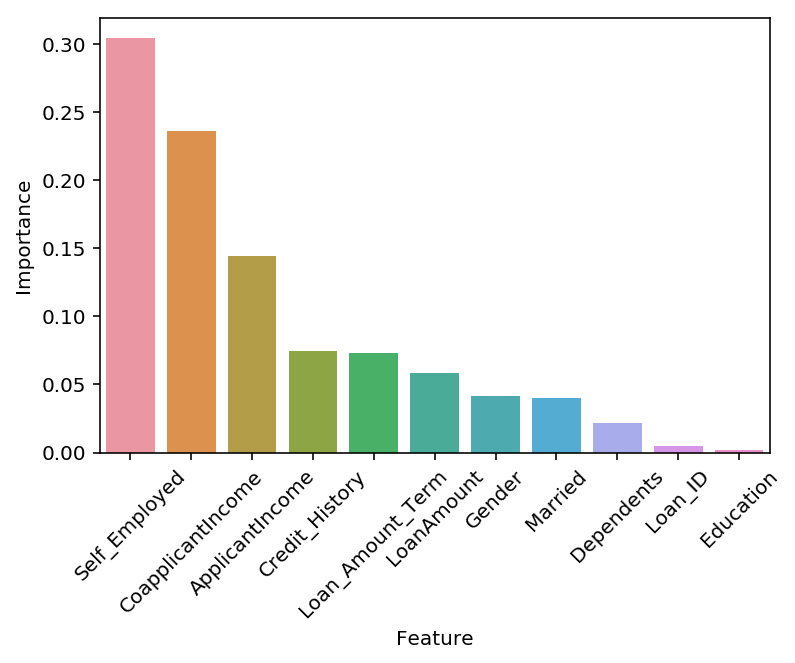

In [228]:
g = sns.barplot(data=feature_importance.sort_values('Importance', ascending=False), x='Feature', y='Importance')
plt.xticks(rotation=45)

### Improvement: Grid Search

In [230]:
clf = XGBClassifier()
clf.fit(X_train, df_train['Loan_Status'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [246]:
def grid_search(X, y, parameters):
    print(parameters)
    clf = GridSearchCV(XGBClassifier(), parameters)
    clf.fit(X, y)
    print(clf.best_params_)
    print(clf.score(X_train, df_train['Loan_Status']))
    param1, param2 = parameters.keys()
    score_grid = clf.cv_results_['mean_test_score'].reshape(len(parameters[param1]),len(parameters[param2]))
    ax = sns.heatmap(pd.DataFrame(score_grid, index=parameters[param1], columns=parameters[param2]), cmap="Blues")
    ax.set_xlabel(param2)
    ax.set_ylabel(param1)    

{'max_depth': array([1, 2, 3, 4, 5, 6]), 'n_estimators': array([  10,   25,   63,  158,  398, 1000])}
{'max_depth': 1, 'n_estimators': 10}
0.809446254072


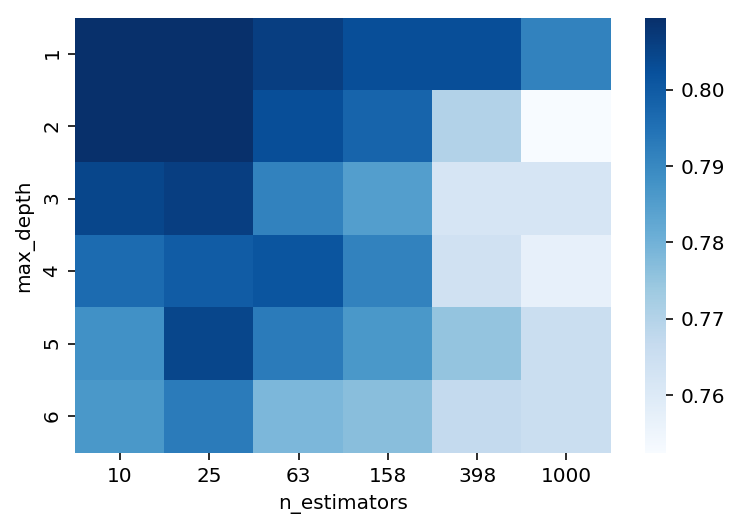

In [247]:
n_estimators = np.logspace(1, 3, 6).astype(int)
max_depth = np.linspace(1, 6, 6).astype(int)
parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
grid_search(X_train, df_train['Loan_Status'], parameters)

In [260]:
clf = XGBClassifier(max_depth=1, n_estimators=10)
clf.fit(X_train, df_train['Loan_Status'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [261]:
y_pred = clf.predict(X_test)
data = np.hstack((df_test['Loan_ID'].values.reshape(-1,1), y_pred.reshape(-1,1)))
df_out = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_out.to_csv('grid_search.csv', index=False)

### Improvement: Ensemble

In [249]:
results.sort_values('mean', ascending=False).head()

,modelo,scoring,mean,std,time
0,RidgeClassifier,accuracy,0.81,(+/- 0.06),43
10,BernoulliNB,accuracy,0.81,(+/- 0.05),26
7,LogisticRegression,accuracy,0.80,(+/- 0.06),30
11,XGBClassifier,accuracy,0.80,(+/- 0.08),208
2,GaussianNB,accuracy,0.79,(+/- 0.06),34


In [254]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('bernoulli', BernoulliNB()), ('logistic', LogisticRegression()), 
                                    ('xgb', XGBClassifier())],
                        voting='soft')
eclf.fit(X_train, df_train['Loan_Status'])

VotingClassifier(estimators=[('bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=...logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [255]:
eclf.score(X_train, df_train['Loan_Status'])

0.81270358306188928

In [256]:
y_pred = eclf.predict(X_test)

In [257]:
data = np.hstack((df_test['Loan_ID'].values.reshape(-1,1), y_pred.reshape(-1,1)))
df_out = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])

In [259]:
df_out.to_csv('ensemble.csv', index=False)